# DataChallenge

## Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

## Parameters, Hyperparameters, Seed

In [2]:
seed = 42
feature_modif = False
threshold = 0.1

## Data Collection

In [3]:
X = pd.read_csv("x_train_T9QMMVq.csv")
print(f"Dimension of the dataset: {X.shape}")
y = pd.read_csv("y_train_R0MqWmu.csv")
print(f"Dimension of the response vector: {y.shape}")
X_TEST = pd.read_csv("x_test_9F13O5s.csv", sep=",")
print(f"Dimension of the test dataset: {X_TEST.shape}")

Dimension of the dataset: (202933, 14)
Dimension of the response vector: (202933, 24)
Dimension of the test dataset: (134673, 14)


### Train Test split

Shuffle

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142053, 14) (142053, 24)
(60880, 14) (60880, 24)


Times series

In [5]:
split = int(0.7 * len(X))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142053, 14) (142053, 24)
(60880, 14) (60880, 24)


## Data Processing

In [6]:
print(X_train.head())

   ID  Humidity       M12       M13       M14       M15        M4        M5  \
0   0  0.098160 -0.175981 -0.086469 -0.041465 -0.021153  0.197597  0.054646   
1   1  0.000307 -0.066416  0.036071  0.032636 -0.000573  2.568494  1.883142   
2   2  0.000388  0.190943  0.187540  0.143680  0.092635 -0.147460 -0.021174   
3   3  0.761003 -0.151393 -0.083723 -0.048982 -0.018259  0.045380  0.102427   
4   4  0.107808  0.074818  0.042692  0.026169  0.019134 -0.056284 -0.011193   

         M6        M7         R        S1        S2        S3  
0 -0.009277  0.001855  1.007242  1.013007  1.000563  0.999397  
1  0.779251  0.262231  0.971428  0.996735  1.002226  1.013063  
2  0.040079  0.065790  1.302238  0.905275  0.953600  0.986347  
3  0.012915  0.004453  1.013741  1.004315  1.012301  1.009465  
4  0.010233  0.012205  0.998659  1.005154  1.000096  0.999553  


In [7]:
print(y_train.head())

   ID       c01  c02       c03       c04  c05  c06  c07  c08  c09  ...  c14  \
0   0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1   1  0.000000  0.0  0.176471  0.176471  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2   2  0.128465  0.0  0.128465  0.128465  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3   3  0.000000  0.0  0.263736  0.263736  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4   4  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0   

   c15  c16  c17       c18       c19  c20  c21       c22       c23  
0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000  
1  0.0  0.0  0.0  0.000000  0.176471  0.0  0.0  0.176471  0.000000  
2  0.0  0.0  0.0  0.128465  0.000000  0.0  0.0  0.128465  0.000000  
3  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.263736  0.263736  
4  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000  

[5 rows x 24 columns]


### Study of Humidity

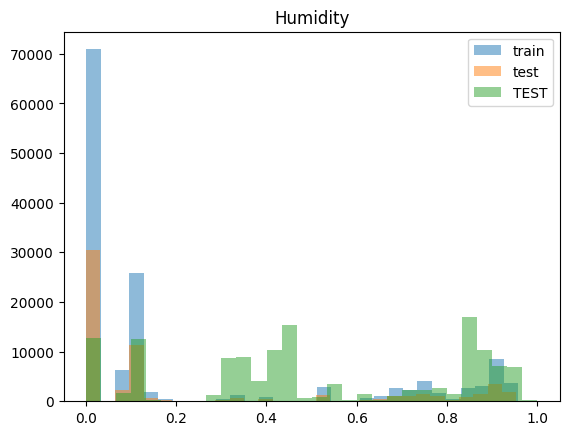

In [8]:
plt.hist(X_train["Humidity"], bins=30, alpha=0.5, label="train")
plt.hist(X_test["Humidity"], bins=30, alpha=0.5, label="test")
plt.hist(X_TEST["Humidity"], bins=30, alpha=0.5, label="TEST")
plt.title("Humidity")
plt.legend()
plt.show()

In [9]:
np.mean(X_train["Humidity"]), np.mean(X_test["Humidity"]), np.mean(X_TEST["Humidity"])

(np.float64(0.22526816450151718),
 np.float64(0.22578323684204102),
 np.float64(0.5121110517453115))

The humidity in X_TEST is much higher than in X. This skews our prediction on the TEST.

The idea is to create two models. One for low humidity and the other for the rest.

In [10]:
# --- Separate the data ---
low_train_idx = X_train['Humidity'] <= threshold
high_train_idx = X_train['Humidity'] > threshold

low_test_idx = X_test['Humidity'] <= threshold
high_test_idx = X_test['Humidity'] > threshold

low_TEST_idx = X_TEST['Humidity'] <= threshold
high_TEST_idx = X_TEST['Humidity'] > threshold

X_train_low, y_train_low = X_train[low_train_idx], y_train[low_train_idx]
X_train_high, y_train_high = X_train[high_train_idx], y_train[high_train_idx]

X_test_low, y_test_low = X_test[low_test_idx], y_test[low_test_idx]
X_test_high, y_test_high = X_test[high_test_idx], y_test[high_test_idx]

X_TEST_low = X_TEST[low_TEST_idx]
X_TEST_high = X_TEST[high_TEST_idx]

In [11]:
print(X_train_low.shape, y_train_low.shape)
print(X_train_high.shape, y_train_high.shape)

print(X_test_low.shape, y_test_low.shape)
print(X_test_high.shape, y_test_high.shape)

print(X_TEST_low.shape)
print(X_TEST_high.shape)

(84656, 14) (84656, 24)
(57397, 14) (57397, 24)
(36468, 14) (36468, 24)
(24412, 14) (24412, 24)
(14482, 14)
(120191, 14)


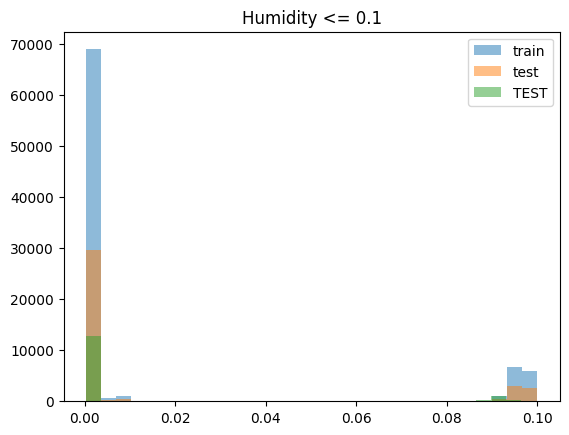

In [12]:
plt.hist(X_train_low["Humidity"], bins=30, alpha=0.5, label="train")
plt.hist(X_test_low["Humidity"], bins=30, alpha=0.5, label="test")
plt.hist(X_TEST_low["Humidity"], bins=30, alpha=0.5, label="TEST")
plt.title(f"Humidity <= {threshold}")
plt.legend()
plt.show()

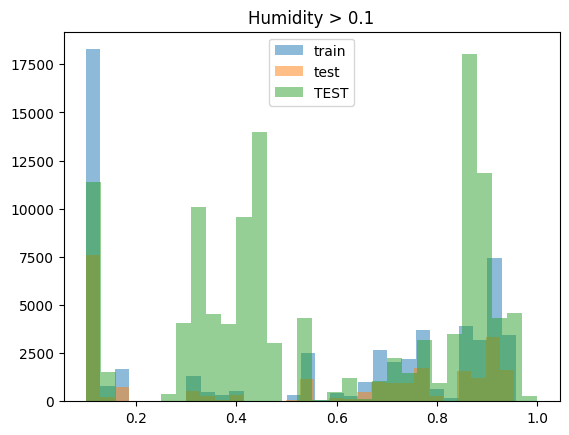

In [13]:
plt.hist(X_train_high["Humidity"], bins=30, alpha=0.5, label="train")
plt.hist(X_test_high["Humidity"], bins=30, alpha=0.5, label="test")
plt.hist(X_TEST_high["Humidity"], bins=30, alpha=0.5, label="TEST")
plt.title(f"Humidity > {threshold}")
plt.legend()
plt.show()

In [14]:
print(np.mean(X_train_low["Humidity"]), np.mean(X_test_low["Humidity"]), np.mean(X_TEST_low["Humidity"]))
print(np.mean(X_train_high["Humidity"]), np.mean(X_test_high["Humidity"]), np.mean(X_TEST_high["Humidity"]))

0.016110253300145927 0.016338178670189343 0.01063761258955206
0.5337594119650307 0.5386638849417906 0.5725343641884537


We separated the initial dataset into two datasets. One that contains the lines with low humidity and the other that contains the rest of the lines. This allowed to reduce the difference between the averages of the Humidity column according to the datasets. So we will predict the lines with low humidity separately from the other lines.

### Feature engineering

In [15]:
print(X.columns)

Index(['ID', 'Humidity', 'M12', 'M13', 'M14', 'M15', 'M4', 'M5', 'M6', 'M7',
       'R', 'S1', 'S2', 'S3'],
      dtype='object')


In [16]:
def feature_engineering(X):
    X = X.copy()
    X["M_big"] = X["M12"] + X["M13"] + X["M14"] + X["M15"]
    X["M_small"] = X["M4"] + X["M5"] + X["M6"] + X["M7"]
    X["S"] = X["S1"] + X["S2"] + X["S3"]
    X["Total"] = X["Humidity"] + X["M_big"] + X["M_small"] + X["R"] +  X["S"]
    return X

### Data processing function

In [17]:
def data_processing(X, y=None):
    X = X.copy()
    X.set_index("ID", inplace=True)
    if feature_modif:
        X = feature_engineering(X)

    low_idx = X['Humidity'] <= threshold
    high_idx = X['Humidity'] > threshold

    if y is not None:
        y = y.copy()
        y.set_index("ID", inplace=True)
        
        X_low, y_low = X[low_idx], y[low_idx]
        X_high, y_high = X[high_idx], y[high_idx]
        return X_low, y_low, X_high, y_high, low_idx, high_idx
    else:
        X_low = X[low_idx]
        X_high = X[high_idx]
        return X_low, X_high, low_idx, high_idx

In [18]:
X_train_low, y_train_low, X_train_high, y_train_high, low_train_idx, high_train_idx = data_processing(X_train, y_train)
X_test_low, y_test_low, X_test_high, y_test_high, low_test_idx, high_test_idx = data_processing(X_test, y_test)
X_TEST_low, X_TEST_high, low_TEST_idx, high_TEST_idx = data_processing(X_TEST, None)

In [19]:
print(X_train_low.shape, y_train_low.shape)
print(X_train_high.shape, y_train_high.shape)
print(X_test_low.shape, y_test_low.shape)
print(X_test_high.shape, y_test_high.shape)
print(X_TEST_low.shape)
print(X_TEST_high.shape)

(84656, 13) (84656, 23)
(57397, 13) (57397, 23)
(36468, 13) (36468, 23)
(24412, 13) (24412, 23)
(14482, 13)
(120191, 13)


## Models

Random Forest

In [20]:
# --- Train the two models ---
model_low = RandomForestRegressor(
        n_estimators=5,
        max_depth=15,
        min_samples_split=0.01,
        min_samples_leaf=10,
        random_state=seed
    )
model_high = RandomForestRegressor(
        n_estimators=5,
        max_depth=15,
        min_samples_split=0.01,
        min_samples_leaf=10,
        random_state=seed
    )

model_low.fit(X_train_low, y_train_low)
model_high.fit(X_train_high, y_train_high)

,n_estimators,5
,criterion,'squared_error'
,max_depth,15
,min_samples_split,0.01
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
# --- Prediction on each subset ---
y_train_pred_low = model_low.predict(X_train_low)
y_train_pred_high = model_high.predict(X_train_high)

y_test_pred_low = model_low.predict(X_test_low)
y_test_pred_high = model_high.predict(X_test_high)

print(y_train_pred_low.shape, y_train_pred_high.shape)
print(y_test_pred_low.shape, y_test_pred_high.shape)

(84656, 23) (57397, 23)
(36468, 23) (24412, 23)


In [22]:
y_train_pred_low_clipped = np.clip(y_train_pred_low, 0, 1)
y_train_pred_high_clipped = np.clip(y_train_pred_high, 0, 1)

y_test_pred_low_clipped = np.clip(y_test_pred_low, 0, 1)
y_test_pred_high_clipped = np.clip(y_test_pred_high, 0, 1)

rmse_train_low = root_mean_squared_error(y_train_low, y_train_pred_low_clipped)
rmse_train_high = root_mean_squared_error(y_train_high, y_train_pred_high_clipped)

rmse_test_low = root_mean_squared_error(y_test_low, y_test_pred_low_clipped)
rmse_test_high = root_mean_squared_error(y_test_high, y_test_pred_high_clipped)

print(f"rmse train low: {rmse_train_low}")
print(f"rmse train high: {rmse_train_high}")

print(f"rmse test low: {rmse_test_low}")
print(f"rmse test high: {rmse_test_high}")

rmse train low: 0.06183308076567511
rmse train high: 0.0639186146798369
rmse test low: 0.061737807066152034
rmse test high: 0.06426708335465756


In [23]:
len(X_test), y_test_pred_low_clipped.shape[1]

(60880, 23)

In [24]:
# -- Reconstruct the complete result in the correct order ---
# Create an empty table for the entire train and for the entire test
y_train_pred_full = np.zeros((len(X_train), y_train_pred_low_clipped.shape[1]))
y_test_pred_full = np.zeros((len(X_test), y_test_pred_low_clipped.shape[1]))

# Insert the correct lines
y_train_pred_full[low_train_idx.values] = y_train_pred_low_clipped
y_train_pred_full[high_train_idx.values] = y_train_pred_high_clipped

y_test_pred_full[low_test_idx.values] = y_test_pred_low_clipped
y_test_pred_full[high_test_idx.values] = y_test_pred_high_clipped

In [25]:
y_train.set_index("ID", inplace=True)
y_test.set_index("ID", inplace=True)
rmse_train = root_mean_squared_error(y_train, y_train_pred_full)
rmse_test = root_mean_squared_error(y_test, y_test_pred_full)
print(f"rmse train: {rmse_train}")
print(f"rmse test: {rmse_test}")

rmse train: 0.06430243897769429
rmse test: 0.06444438437106804


## Generating Submission File

### Training of the models on all the data

In [26]:
X_low, y_low, X_high, y_high, low_idx, high_idx = data_processing(X, y)
print(X_low.shape, y_low.shape)
print(X_high.shape, y_high.shape)
model_low.fit(X_low, y_low)
model_high.fit(X_high, y_high)

(121124, 13) (121124, 23)
(81809, 13) (81809, 23)


,n_estimators,5
,criterion,'squared_error'
,max_depth,15
,min_samples_split,0.01
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Prediction of the models

In [27]:
y_TEST_pred_low = model_low.predict(X_TEST_low)
y_TEST_pred_high = model_high.predict(X_TEST_high)

y_TEST_pred_low_clipped = np.clip(y_TEST_pred_low, 0, 1)
y_TEST_pred_high_clipped = np.clip(y_TEST_pred_high, 0, 1)

In [28]:
# -- Reconstruct the complete result in the correct order ---
# Create an empty table for the entire TEST
y_TEST_pred_full_clipped = np.zeros((len(X_TEST), y_TEST_pred_low_clipped.shape[1]))

# Insert the correct lines
y_TEST_pred_full_clipped[low_TEST_idx.values] = y_TEST_pred_low_clipped
y_TEST_pred_full_clipped[high_TEST_idx.values] = y_TEST_pred_high_clipped

m, n = y_TEST_pred_full_clipped.shape
print(m,n)

134673 23


### Creating submission file

In [29]:
columns = ["ID"] + list(y_test.columns)
print(columns)
print(len(columns))
C0 = np.array([i + 202933 for i in range(0,m)])
C0 = C0.reshape(-1, 1)
y_TEST_pred_new = np.hstack((C0, y_TEST_pred_full_clipped))
print(y_TEST_pred_new.shape)

['ID', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23']
24
(134673, 24)


In [30]:
submission = pd.DataFrame(y_TEST_pred_new, columns=columns)
submission["ID"] = submission["ID"].astype(int)

submission.to_csv('submission.csv', index=False, sep=',')
print(submission.shape)
print(submission.head())

(134673, 24)
       ID       c01       c02       c03       c04       c05       c06  \
0  202933  0.000069  0.000104  0.001615  0.001615  0.000012  0.000012   
1  202934  0.716579  0.000000  0.721959  0.721959  0.000000  0.000000   
2  202935  0.000000  0.000000  0.273322  0.273322  0.273322  0.273322   
3  202936  0.000000  0.173547  0.671745  0.671745  0.498198  0.498198   
4  202937  0.044628  0.000017  0.111287  0.111287  0.002628  0.002628   

        c07       c08       c09  ...       c14  c15       c16       c17  \
0  0.000104  0.000029  0.000004  ...  0.000028  0.0  0.001331  0.000059   
1  0.000000  0.000000  0.000000  ...  0.716579  0.0  0.005379  0.000000   
2  0.000000  0.000000  0.000000  ...  0.000000  0.0  0.000000  0.000000   
3  0.173547  0.000000  0.000000  ...  0.000000  0.0  0.000000  0.000000   
4  0.000017  0.000000  0.000000  ...  0.000000  0.0  0.000000  0.000000   

        c18      c19       c20       c21       c22       c23  
0  0.000011  0.00002  0.000104  0.